In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/urbansound8k/UrbanSound8K.csv
/kaggle/input/urbansound8k/fold7/164797-2-0-8.wav
/kaggle/input/urbansound8k/fold7/177537-7-2-0.wav
/kaggle/input/urbansound8k/fold7/177729-0-0-68.wav
/kaggle/input/urbansound8k/fold7/6902-2-0-18.wav
/kaggle/input/urbansound8k/fold7/518-4-0-2.wav
/kaggle/input/urbansound8k/fold7/146845-0-0-2.wav
/kaggle/input/urbansound8k/fold7/116485-3-2-4.wav
/kaggle/input/urbansound8k/fold7/518-4-0-3.wav
/kaggle/input/urbansound8k/fold7/44737-5-0-2.wav
/kaggle/input/urbansound8k/fold7/201988-5-0-3.wav
/kaggle/input/urbansound8k/fold7/181102-9-0-50.wav
/kaggle/input/urbansound8k/fold7/99812-1-6-0.wav
/kaggle/input/urbansound8k/fold7/39857-5-0-0.wav
/kaggle/input/urbansound8k/fold7/61503-2-0-6.wav
/kaggle/input/urbansound8k/fold7/162728-1-0-0.wav
/kaggle/input/urbansound8k/fold7/89443-9-0-48.wav
/kaggle/input/urbansound8k/fold7/168846-5-1-13.wav
/kaggle/input/urbansound8k/fold7/149193-5-0-2.wav
/kaggle/input/urbansound8k/fold7/71529-4-0-2.wav
/kaggle/input/u

# Importing Libraries

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report , accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


import os
import time
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,average_precision_score,f1_score

import librosa
import IPython.display as ipd
import random


# Dataset

In [3]:
df = pd.read_csv("../input/urbansound8k/UrbanSound8K.csv")
df.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [4]:
folder_path = "../input/urbansound8k"

folds = os.listdir(folder_path)
print(folds)
fold_paths = [os.path.join(folder_path, i) for i in folds]
fold_paths

random.shuffle(fold_paths)
fold_paths

s = time.time()
train_data_paths = []

for i in range(9):
    
    curr_folder_path = fold_paths[i]
    
    if (curr_folder_path == "../input/urbansound8k/UrbanSound8K.csv"):
        continue
    
    curr_files = os.listdir(curr_folder_path)
    
    file_paths = [os.path.join(curr_folder_path, file) for file in curr_files]
    
    for j in range(len(file_paths)):
        curr_file = curr_files[j]
        class_id = df[df['slice_file_name'] == curr_file]
        arr = np.array(class_id['classID'])

        train_data_paths.append([file_paths[j], arr[0]])
        
        
e = time.time()
print((e-s)/60, " mins")
print(len(train_data_paths))


s = time.time()

test_data_paths = []
for i in range(9,11):
    
    curr_folder_path = fold_paths[i]
    
    if (curr_folder_path == "../input/urbansound8k/UrbanSound8K.csv"):
        continue
    
    curr_files = os.listdir(curr_folder_path)
    
    file_paths = [os.path.join(curr_folder_path, file) for file in curr_files]
    
    for j in range(len(file_paths)):
        curr_file = curr_files[j]
        class_id = df[df['slice_file_name'] == curr_file]
        arr = np.array(class_id['classID'])

        test_data_paths.append([file_paths[j], arr[0]])
        
      
e = time.time()
print((e-s)/60, " mins")
print(len(test_data_paths))


data_paths = []

s = time.time()

for i in range(11):
    
    curr_folder_path = fold_paths[i]
    
    if (curr_folder_path == "../input/urbansound8k/UrbanSound8K.csv"):
        continue
    
    curr_files = os.listdir(curr_folder_path)
    
    file_paths = [os.path.join(curr_folder_path, file) for file in curr_files]
    
    for j in range(len(file_paths)):
        curr_file = curr_files[j]
        class_id = df[df['slice_file_name'] == curr_file]
        arr = np.array(class_id['classID'])

        data_paths.append([file_paths[j], arr[0]])
     
e = time.time()
print((e-s)/60, " mins")

['fold7', 'fold1', 'fold3', 'fold5', 'fold10', 'UrbanSound8K.csv', 'fold9', 'fold8', 'fold4', 'fold2', 'fold6']
0.23003018697102864  mins
6919
0.05949866771697998  mins
1813
0.30348952611287433  mins


# Feature extraction

In [5]:
features_list = {"ae_mean":[], "ae_var":[], "rms_mean":[], "rms_var":[], "zcr_mean":[], "zcr_var":[], "chroma_stft_mean":[], 
            "chroma_stft_var":[], "spec_centroid_mean":[], "spec_centroid_var":[], "spec_cont_mean":[], "spec_cont_var":[],
            "spec_bw_mean":[], "spec_bw_var":[],"percep_mean":[], "percep_var":[], "tempo_mean":[], "tempo_var":[], 
            "roll_off_mean":[], "roll_off_var":[], "roll_off50_mean":[],"roll_off50_var":[],"roll_off25_mean":[],"roll_off25_var":[],
            "log_mel_mean":[], "log_mel_var":[], "mfcc_mean":[], "mfcc_var":[],"spec_mean":[], "spec_var":[], 
            "mag_spec_mean" :[] ,"mag_spec_var":[], "mel_mean":[], "mel_var":[]}

define feature

In [7]:
FRAME_LENGTH = 2048
HOP_LENGTH = 512
FRAME_SIZE = 2048
HOP_SIZE = 512


def amplitude_envelope(signal, frame_size = 2048, hop_length = 512):
    amplitude_envelope = []
        
    for i in range(0, len(signal), hop_length):
        current_frame_amplitude_envelope = max(signal[i:i+frame_size])
        amplitude_envelope.append(current_frame_amplitude_envelope)
        
    return np.array(amplitude_envelope)

def Rms(song):
    rms_song = librosa.feature.rms(y = song, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
    return rms_song


def Zcr(song):
    zcr_song = librosa.feature.zero_crossing_rate(y = song, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
    return zcr_song

def Mag_spec(song):
    signal_ft = np.fft.fft(song)
    magnitude_spectrum = np.abs(signal_ft)
    return magnitude_spectrum
    
def spectrogram(song):
    song_stft = librosa.stft(song, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
    y_song = np.abs(song_stft)**2
    return y_song

def log_spec(song):    
    spec_song = spectrogram(song)
    y_song_log = librosa.power_to_db(spec_song)

def log_mel(song, samp_rate):
    mel_spectrogram = librosa.feature.melspectrogram(y = song, n_fft= 2048, sr = samp_rate, hop_length = 512 ,n_mels=50)
    log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
    return log_mel_spectrogram

def Mfcc(song, samp_rate, nmfcc = 13):
    mfccs = librosa.feature.mfcc(y = song, n_mfcc= nmfcc, sr = samp_rate)
    return mfccs

def delta_mfcc(song, samp_rate, nmfcc = 13):
    mfccs = Mfcc(song,samp_rate)
    delta_mfcc = librosa.feature.delta(mfccs)
    delta2_mfcc = librosa.feature.delta(mfccs, order=2)
    delta3_mfcc = librosa.feature.delta(mfccs, order=3)
    delta4_mfcc = librosa.feature.delta(mfccs, order=4)
    delta5_mfcc = librosa.feature.delta(mfccs, order=5)
    delta6_mfcc = librosa.feature.delta(mfccs, order=6)

    return (delta_mfcc, delta2_mfcc, delta3_mfcc, delta4_mfcc, delta5_mfcc, delta6_mfcc)

def Chroma_stft(song, samp_rate):  
    c_stft = librosa.feature.chroma_stft(y = song,sr = samp_rate)
    return c_stft

def Spec_centriod(song, samp_rate):
    return librosa.feature.spectral_centroid(y = song,sr = samp_rate)

# spectral rolloff is the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies.
def spec_roll_off(song, samp_rate):
    return librosa.feature.spectral_rolloff(y = song, sr =samp_rate)

def spec_roll_off50(song, samp_rate):
    return librosa.feature.spectral_rolloff(y = song, sr= samp_rate, roll_percent=0.5)

def spec_roll_off25(song, samp_rate):
    return librosa.feature.spectral_rolloff(y = song,sr = samp_rate, roll_percent=0.25)

def spec_contrast(song, samp_rate):
    return librosa.feature.spectral_contrast(y = song,sr = samp_rate)

def perceptual_wt(song, samp_rate):
    return librosa.perceptual_weighting(S = song)

def tempogram(song, samp_rate):
    return librosa.feature.tempogram(y = song, sr = samp_rate)

def spec_bandwidth(song, samp_rate):
    return librosa.feature.spectral_bandwidth(y = song, sr = samp_rate)

In [8]:
s = time.time()
for i in range(len(data_paths)):
    
    sample , sr = librosa.load(data_paths[i][0])
    
    
    ae = amplitude_envelope(sample, frame_size = 2048, hop_length = 512)
    ae_m, ae_v = ae.mean(), ae.var()
    features_list["ae_mean"].append(ae_m)
    features_list["ae_var"].append(ae_v)
    
    
    rms = Rms(sample)
    rms_m, rms_v = rms.mean(), rms.var()
    features_list["rms_mean"].append(rms_m)
    features_list["rms_var"].append(rms_v)
    
    zcr =  Zcr(sample)
    zcr_m, zcr_v = zcr.mean(), zcr.var()
    features_list["zcr_mean"].append(zcr_m)
    features_list['zcr_var'].append(zcr_v)
    
    
    mag_spec = Mag_spec(sample)
    features_list["mag_spec_mean"].append(mag_spec.mean())
    features_list["mag_spec_var"].append(mag_spec.var())
    
    
    spec = spectrogram(sample)
    features_list["spec_mean"].append(spec.mean())
    features_list['spec_var'].append(spec.var())
    
    
    mel_spec = log_mel(sample, sr)
    features_list["mel_mean"].append(mel_spec.mean())
    features_list["mel_var"].append(mel_spec.var())
    
    
    mfcc = Mfcc(sample, sr)
    features_list["mfcc_mean"].append(mfcc.mean())
    features_list["mfcc_var"].append(mfcc.var())
    
            
    chroma_stft = Chroma_stft(sample, sr)
    features_list["chroma_stft_mean"].append(chroma_stft.mean())
    features_list['chroma_stft_var'].append(chroma_stft.var())
    
    spec_centriod = Spec_centriod(sample, sr)
    features_list['spec_centroid_mean'].append(spec_centriod.mean())
    features_list['spec_centroid_var'].append(spec_centriod.var())
    
    
    spec_roll = spec_roll_off(sample, sr)
    features_list["roll_off_mean"].append(spec_roll.mean())
    features_list['roll_off_var'].append(spec_roll.var())
    
    
    spec_roll50 = spec_roll_off50(sample, sr)
    features_list["roll_off50_mean"].append(spec_roll50.mean())
    features_list['roll_off50_var'].append(spec_roll50.var())
    
    
    spec_roll25 =  spec_roll_off25(sample, sr)
    features_list["roll_off25_mean"].append(spec_roll25.mean())
    features_list['roll_off25_var'].append(spec_roll25.var())
    
    
    spec_contr =  spec_contrast(sample, sr)
    features_list["spec_cont_mean"].append(spec_contr.mean())
    features_list['spec_cont_var'].append(spec_contr.var())
    

#     percep =  perceptual_wt(sample, sr)
#     features_list["percep_mean"].append(percep.mean())
#     features_list['percep_var'].append(percep.var())
    
    
    tempo =  tempogram(sample, sr)
    features_list["tempo_mean"].append(tempo.mean())
    features_list["tempo_var"].append(tempo.var())
    
    
    spec_bw =  spec_bandwidth(sample, sr)
    features_list["spec_bw_mean"].append(spec_bw.mean())
    features_list['spec_bw_var'].append(spec_bw.var())
    
    log_me = log_mel(sample, sr)
    features_list["log_mel_mean"].append(log_me.mean())
    features_list['log_mel_var'].append(log_me.var())
    
#     print(i)

    
e = time.time()
print((e - s)/60  , "mins")

/opt/conda/lib/python3.10/site-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(


43.879228186607364 mins


In [11]:
keys = features_list.keys()

for key in keys:
    print(len(features_list[key]), key)
    
# del features_list["percep_mean"]
# del features_list["percep_var"]


8732 ae_mean
8732 ae_var
8732 rms_mean
8732 rms_var
8732 zcr_mean
8732 zcr_var
8732 chroma_stft_mean
8732 chroma_stft_var
8732 spec_centroid_mean
8732 spec_centroid_var
8732 spec_cont_mean
8732 spec_cont_var
8732 spec_bw_mean
8732 spec_bw_var
8732 tempo_mean
8732 tempo_var
8732 roll_off_mean
8732 roll_off_var
8732 roll_off50_mean
8732 roll_off50_var
8732 roll_off25_mean
8732 roll_off25_var
8732 log_mel_mean
8732 log_mel_var
8732 mfcc_mean
8732 mfcc_var
8732 spec_mean
8732 spec_var
8732 mag_spec_mean
8732 mag_spec_var
8732 mel_mean
8732 mel_var


,ae_mean,ae_var,rms_mean,rms_var,zcr_mean,zcr_var,chroma_stft_mean,chroma_stft_var,spec_centroid_mean,spec_centroid_var,...,log_mel_mean,log_mel_var,mfcc_mean,mfcc_var,spec_mean,spec_var,mag_spec_mean,mag_spec_var,mel_mean,mel_var
0,0.245415,0.015601,0.037853,2.201450e-04,0.319545,0.003603,0.536480,0.055927,4463.145407,211703.191382,...,-12.008903,41.427097,-10.733800,1898.250000,1.278410,17.112555,4.432197,16.400891,-12.008903,41.427097
1,0.279795,0.112458,0.123249,3.376697e-02,0.116953,0.002130,0.476154,0.074844,2100.012073,216300.966468,...,-15.858149,276.636749,-9.980119,5176.873047,37.942039,412107.281250,26.492576,3686.952420,-15.858149,276.636749
2,0.308250,0.013030,0.052565,3.414849e-04,0.261096,0.003973,0.595028,0.053249,3982.677959,247570.637116,...,-8.823648,55.785110,-12.139519,1327.431885,2.384276,86.447197,9.841708,116.373572,-8.823648,55.785110
3,0.009744,0.000008,0.003729,4.380487e-07,0.029832,0.000320,0.635935,0.053976,1173.583323,44271.029603,...,-45.425640,183.975357,-20.504711,22092.955078,0.011150,0.020832,0.154613,0.361530,-45.425640,183.975357
4,0.077487,0.000398,0.026391,5.330324e-05,0.084354,0.004592,0.554081,0.063365,1894.959689,350596.440927,...,-21.678991,138.044891,-5.937609,6258.692871,0.576130,77.795074,2.773239,58.852575,-21.678991,138.044891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8727,0.401277,0.011739,0.130473,1.161128e-03,0.077318,0.000259,0.315830,0.091946,1654.083803,119120.556011,...,-7.959998,160.328186,3.495679,2210.931885,14.043017,24203.246094,15.756954,1364.748738,-7.959998,160.328186
8728,0.067619,0.000083,0.020724,6.152537e-06,0.094038,0.000153,0.422655,0.063282,1637.754242,16459.457003,...,-21.468460,173.477676,-8.810062,6426.569824,0.334931,6.081227,2.231394,33.708484,-21.468460,173.477676
8729,0.157210,0.002096,0.051742,1.613341e-04,0.063908,0.000288,0.384412,0.085278,1377.049052,45816.000527,...,-16.265545,206.226227,-4.337486,4849.889648,2.199285,768.150024,5.612822,220.597914,-16.265545,206.226227
8730,0.042563,0.007562,0.011738,6.398233e-04,0.076575,0.000284,0.409602,0.090815,1729.108895,151036.781031,...,-39.849377,240.554153,-28.209936,16857.474609,0.596918,882.877319,2.101120,64.507820,-39.849377,240.554153


feature dataset

In [12]:
feature_df = pd.DataFrame(features_list)
feature_df

,ae_mean,ae_var,rms_mean,rms_var,zcr_mean,zcr_var,chroma_stft_mean,chroma_stft_var,spec_centroid_mean,spec_centroid_var,...,log_mel_mean,log_mel_var,mfcc_mean,mfcc_var,spec_mean,spec_var,mag_spec_mean,mag_spec_var,mel_mean,mel_var
0,0.245415,0.015601,0.037853,2.201450e-04,0.319545,0.003603,0.536480,0.055927,4463.145407,211703.191382,...,-12.008903,41.427097,-10.733800,1898.250000,1.278410,17.112555,4.432197,16.400891,-12.008903,41.427097
1,0.279795,0.112458,0.123249,3.376697e-02,0.116953,0.002130,0.476154,0.074844,2100.012073,216300.966468,...,-15.858149,276.636749,-9.980119,5176.873047,37.942039,412107.281250,26.492576,3686.952420,-15.858149,276.636749
2,0.308250,0.013030,0.052565,3.414849e-04,0.261096,0.003973,0.595028,0.053249,3982.677959,247570.637116,...,-8.823648,55.785110,-12.139519,1327.431885,2.384276,86.447197,9.841708,116.373572,-8.823648,55.785110
3,0.009744,0.000008,0.003729,4.380487e-07,0.029832,0.000320,0.635935,0.053976,1173.583323,44271.029603,...,-45.425640,183.975357,-20.504711,22092.955078,0.011150,0.020832,0.154613,0.361530,-45.425640,183.975357
4,0.077487,0.000398,0.026391,5.330324e-05,0.084354,0.004592,0.554081,0.063365,1894.959689,350596.440927,...,-21.678991,138.044891,-5.937609,6258.692871,0.576130,77.795074,2.773239,58.852575,-21.678991,138.044891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8727,0.401277,0.011739,0.130473,1.161128e-03,0.077318,0.000259,0.315830,0.091946,1654.083803,119120.556011,...,-7.959998,160.328186,3.495679,2210.931885,14.043017,24203.246094,15.756954,1364.748738,-7.959998,160.328186
8728,0.067619,0.000083,0.020724,6.152537e-06,0.094038,0.000153,0.422655,0.063282,1637.754242,16459.457003,...,-21.468460,173.477676,-8.810062,6426.569824,0.334931,6.081227,2.231394,33.708484,-21.468460,173.477676
8729,0.157210,0.002096,0.051742,1.613341e-04,0.063908,0.000288,0.384412,0.085278,1377.049052,45816.000527,...,-16.265545,206.226227,-4.337486,4849.889648,2.199285,768.150024,5.612822,220.597914,-16.265545,206.226227
8730,0.042563,0.007562,0.011738,6.398233e-04,0.076575,0.000284,0.409602,0.090815,1729.108895,151036.781031,...,-39.849377,240.554153,-28.209936,16857.474609,0.596918,882.877319,2.101120,64.507820,-39.849377,240.554153


In [13]:
df = df[['fsID', 'start', 'end', 'salience', 'fold','classID']]

combined dataset

In [14]:
frames = [df,feature_df]
data = pd.concat(frames, axis =1)
data

,fsID,start,end,salience,fold,classID,ae_mean,ae_var,rms_mean,rms_var,...,log_mel_mean,log_mel_var,mfcc_mean,mfcc_var,spec_mean,spec_var,mag_spec_mean,mag_spec_var,mel_mean,mel_var
0,100032,0.000000,0.317551,1,5,3,0.245415,0.015601,0.037853,2.201450e-04,...,-12.008903,41.427097,-10.733800,1898.250000,1.278410,17.112555,4.432197,16.400891,-12.008903,41.427097
1,100263,58.500000,62.500000,1,5,2,0.279795,0.112458,0.123249,3.376697e-02,...,-15.858149,276.636749,-9.980119,5176.873047,37.942039,412107.281250,26.492576,3686.952420,-15.858149,276.636749
2,100263,60.500000,64.500000,1,5,2,0.308250,0.013030,0.052565,3.414849e-04,...,-8.823648,55.785110,-12.139519,1327.431885,2.384276,86.447197,9.841708,116.373572,-8.823648,55.785110
3,100263,63.000000,67.000000,1,5,2,0.009744,0.000008,0.003729,4.380487e-07,...,-45.425640,183.975357,-20.504711,22092.955078,0.011150,0.020832,0.154613,0.361530,-45.425640,183.975357
4,100263,68.500000,72.500000,1,5,2,0.077487,0.000398,0.026391,5.330324e-05,...,-21.678991,138.044891,-5.937609,6258.692871,0.576130,77.795074,2.773239,58.852575,-21.678991,138.044891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8727,99812,159.522205,163.522205,2,7,1,0.401277,0.011739,0.130473,1.161128e-03,...,-7.959998,160.328186,3.495679,2210.931885,14.043017,24203.246094,15.756954,1364.748738,-7.959998,160.328186
8728,99812,181.142431,183.284976,2,7,1,0.067619,0.000083,0.020724,6.152537e-06,...,-21.468460,173.477676,-8.810062,6426.569824,0.334931,6.081227,2.231394,33.708484,-21.468460,173.477676
8729,99812,242.691902,246.197885,2,7,1,0.157210,0.002096,0.051742,1.613341e-04,...,-16.265545,206.226227,-4.337486,4849.889648,2.199285,768.150024,5.612822,220.597914,-16.265545,206.226227
8730,99812,253.209850,255.741948,2,7,1,0.042563,0.007562,0.011738,6.398233e-04,...,-39.849377,240.554153,-28.209936,16857.474609,0.596918,882.877319,2.101120,64.507820,-39.849377,240.554153


In [15]:
data.columns

Index(['fsID', 'start', 'end', 'salience', 'fold', 'classID', 'ae_mean',
       'ae_var', 'rms_mean', 'rms_var', 'zcr_mean', 'zcr_var',
       'chroma_stft_mean', 'chroma_stft_var', 'spec_centroid_mean',
       'spec_centroid_var', 'spec_cont_mean', 'spec_cont_var', 'spec_bw_mean',
       'spec_bw_var', 'tempo_mean', 'tempo_var', 'roll_off_mean',
       'roll_off_var', 'roll_off50_mean', 'roll_off50_var', 'roll_off25_mean',
       'roll_off25_var', 'log_mel_mean', 'log_mel_var', 'mfcc_mean',
       'mfcc_var', 'spec_mean', 'spec_var', 'mag_spec_mean', 'mag_spec_var',
       'mel_mean', 'mel_var'],
      dtype='object')

In [16]:
data.isnull().sum()

fsID                  0
start                 0
end                   0
salience              0
fold                  0
classID               0
ae_mean               0
ae_var                0
rms_mean              0
rms_var               0
zcr_mean              0
zcr_var               0
chroma_stft_mean      0
chroma_stft_var       0
spec_centroid_mean    0
spec_centroid_var     0
spec_cont_mean        0
spec_cont_var         0
spec_bw_mean          0
spec_bw_var           0
tempo_mean            0
tempo_var             0
roll_off_mean         0
roll_off_var          0
roll_off50_mean       0
roll_off50_var        0
roll_off25_mean       0
roll_off25_var        0
log_mel_mean          0
log_mel_var           0
mfcc_mean             0
mfcc_var              0
spec_mean             0
spec_var              0
mag_spec_mean         0
mag_spec_var          0
mel_mean              0
mel_var               0
dtype: int64

In [17]:
x = data.drop('classID', axis =1 )
y = data['classID']
x

,fsID,start,end,salience,fold,ae_mean,ae_var,rms_mean,rms_var,zcr_mean,...,log_mel_mean,log_mel_var,mfcc_mean,mfcc_var,spec_mean,spec_var,mag_spec_mean,mag_spec_var,mel_mean,mel_var
0,100032,0.000000,0.317551,1,5,0.245415,0.015601,0.037853,2.201450e-04,0.319545,...,-12.008903,41.427097,-10.733800,1898.250000,1.278410,17.112555,4.432197,16.400891,-12.008903,41.427097
1,100263,58.500000,62.500000,1,5,0.279795,0.112458,0.123249,3.376697e-02,0.116953,...,-15.858149,276.636749,-9.980119,5176.873047,37.942039,412107.281250,26.492576,3686.952420,-15.858149,276.636749
2,100263,60.500000,64.500000,1,5,0.308250,0.013030,0.052565,3.414849e-04,0.261096,...,-8.823648,55.785110,-12.139519,1327.431885,2.384276,86.447197,9.841708,116.373572,-8.823648,55.785110
3,100263,63.000000,67.000000,1,5,0.009744,0.000008,0.003729,4.380487e-07,0.029832,...,-45.425640,183.975357,-20.504711,22092.955078,0.011150,0.020832,0.154613,0.361530,-45.425640,183.975357
4,100263,68.500000,72.500000,1,5,0.077487,0.000398,0.026391,5.330324e-05,0.084354,...,-21.678991,138.044891,-5.937609,6258.692871,0.576130,77.795074,2.773239,58.852575,-21.678991,138.044891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8727,99812,159.522205,163.522205,2,7,0.401277,0.011739,0.130473,1.161128e-03,0.077318,...,-7.959998,160.328186,3.495679,2210.931885,14.043017,24203.246094,15.756954,1364.748738,-7.959998,160.328186
8728,99812,181.142431,183.284976,2,7,0.067619,0.000083,0.020724,6.152537e-06,0.094038,...,-21.468460,173.477676,-8.810062,6426.569824,0.334931,6.081227,2.231394,33.708484,-21.468460,173.477676
8729,99812,242.691902,246.197885,2,7,0.157210,0.002096,0.051742,1.613341e-04,0.063908,...,-16.265545,206.226227,-4.337486,4849.889648,2.199285,768.150024,5.612822,220.597914,-16.265545,206.226227
8730,99812,253.209850,255.741948,2,7,0.042563,0.007562,0.011738,6.398233e-04,0.076575,...,-39.849377,240.554153,-28.209936,16857.474609,0.596918,882.877319,2.101120,64.507820,-39.849377,240.554153


In [19]:
x_tr, x_test, y_tr, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(x_tr,y_tr, test_size = 0.3, random_state = 42)

In [20]:
model1= GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model1.fit(x_train, y_train)

y_predii = model1.predict(x_val)
accuracyii = accuracy_score(y_val, y_predii)

print("Accuracy:", accuracyii)

Accuracy: 0.6512404580152672


In [44]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred1 = clf.predict(x_val)
accuracy1 = accuracy_score(y_val, y_pred1)
print("Accuracy For Decision Tree:", accuracy1)

Accuracy For Decision Tree: 0.6827290076335878


In [67]:

clf2 = KNeighborsClassifier(n_neighbors=9)
clf2.fit(x_train, y_train)

y_pred2 = clf2.predict(x_val)
accuracy2 = accuracy_score(y_val, y_pred2)

print("Accuracy:", accuracy2)

Accuracy: 0.12881679389312978


In [71]:

model_bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier())

# Train model on entire training data
model_bagging.fit(x_train, y_train)

model_bagging.fit(x_train, y_train)

y_pred_bagging = model_bagging.predict(x_val)


accuracy_bagging = accuracy_score(y_val, y_pred_bagging)
print(f'Bagging Classifier accuracy: {accuracy_bagging:.3f}')

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Classifier accuracy: 0.731


In [72]:
model = XGBClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=3)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)

best_model = XGBClassifier(**grid_search.best_params_)
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_val)

accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy}')




Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV 1/3] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.343 total time=   1.0s
[CV 2/3] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.375 total time=   0.9s
[CV 3/3] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.381 total time=   0.9s
[CV 1/3] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.372 total time=   1.8s
[CV 2/3] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.394 total time=   1.9s
[CV 3/3] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.398 total time=   1.8s
[CV 1/3] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.414 total time=   3.5s
[CV 2/3] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.416 total time=   3.5s
[CV 3/3] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.419 total time=   3.7s
[CV 1/3] END learning_rate=0.01, max_depth=3, n_estimators=500;, score=0.485 

In [73]:




# predict probabilities
pred_prob1 = best_model.predict_proba(x_test)

from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1,)


from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1, multi_class='ovr')
print(auc_score1)

0.9432657491922605


/tmp/ipykernel_34/1878318351.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


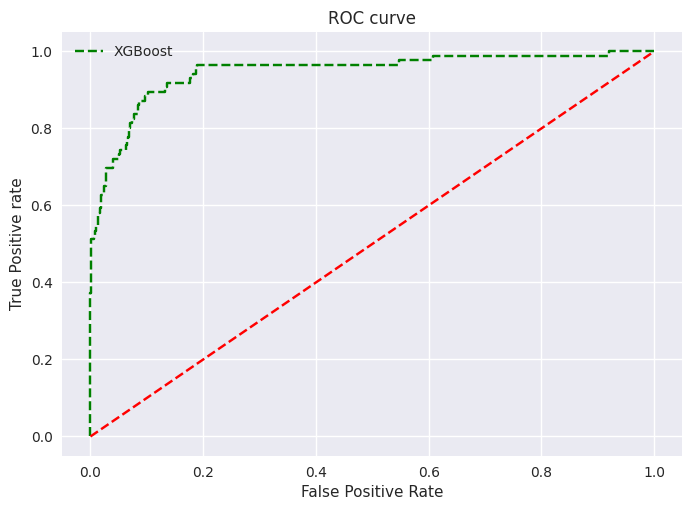

In [74]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

plt.plot(fpr1, tpr1, linestyle='--',color='green', label='XGBoost')
plt.plot(p_fpr, p_tpr, linestyle='--', color='red')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [75]:

y_pred = best_model.predict(x_test)
clr = classification_report(y_pred, y_test)
print(clr)

              precision    recall  f1-score   support

           0       0.87      0.80      0.84       220
           1       0.52      0.83      0.64        54
           2       0.61      0.53      0.57       213
           3       0.36      0.47      0.41       156
           4       0.75      0.70      0.72       221
           5       0.90      0.72      0.80       240
           6       0.61      0.69      0.65        64
           7       0.88      0.86      0.87       211
           8       0.89      0.77      0.83       191
           9       0.48      0.62      0.54       177

    accuracy                           0.70      1747
   macro avg       0.69      0.70      0.69      1747
weighted avg       0.72      0.70      0.71      1747



In [76]:
class_accuracy = {}

for i in range(len(best_model.classes_)):
    class_label = best_model.classes_[i]
    class_accuracy[class_label] = accuracy_score(y_test[y_test == class_label], y_pred[y_test == class_label])
print("Class-wise Accuracy:")
for class_label, acc in class_accuracy.items():
    print(f"{class_label}: {acc}")


Class-wise Accuracy:
0: 0.8719211822660099
1: 0.5232558139534884
2: 0.6120218579234973
3: 0.36318407960199006
4: 0.7475728155339806
5: 0.8963730569948186
6: 0.6111111111111112
7: 0.875
8: 0.8909090909090909
9: 0.4782608695652174


In [23]:
FRAME_LENGTH = 1024
HOP_LENGTH = 128
FRAME_SIZE = 1024
HOP_SIZE = 128


s = time.time()
for i in range(len(data_paths)):
    
    sample , sr = librosa.load(data_paths[i][0])
    
    
    ae = amplitude_envelope(sample, frame_size = 1024, hop_length = 128)
    ae_m, ae_v = ae.mean(), ae.var()
    features_list["ae_mean"].append(ae_m)
    features_list["ae_var"].append(ae_v)
    
    
    rms = Rms(sample)
    rms_m, rms_v = rms.mean(), rms.var()
    features_list["rms_mean"].append(rms_m)
    features_list["rms_var"].append(rms_v)
    
    zcr =  Zcr(sample)
    zcr_m, zcr_v = zcr.mean(), zcr.var()
    features_list["zcr_mean"].append(zcr_m)
    features_list['zcr_var'].append(zcr_v)
    
    
    mag_spec = Mag_spec(sample)
    features_list["mag_spec_mean"].append(mag_spec.mean())
    features_list["mag_spec_var"].append(mag_spec.var())
    
    
    spec = spectrogram(sample)
    features_list["spec_mean"].append(spec.mean())
    features_list['spec_var'].append(spec.var())
    
    
    mel_spec = log_mel(sample, sr)
    features_list["mel_mean"].append(mel_spec.mean())
    features_list["mel_var"].append(mel_spec.var())
    
    
    mfcc = Mfcc(sample, sr)
    features_list["mfcc_mean"].append(mfcc.mean())
    features_list["mfcc_var"].append(mfcc.var())
    
            
    chroma_stft = Chroma_stft(sample, sr)
    features_list["chroma_stft_mean"].append(chroma_stft.mean())
    features_list['chroma_stft_var'].append(chroma_stft.var())
    
    spec_centriod = Spec_centriod(sample, sr)
    features_list['spec_centroid_mean'].append(spec_centriod.mean())
    features_list['spec_centroid_var'].append(spec_centriod.var())
    
    
    spec_roll = spec_roll_off(sample, sr)
    features_list["roll_off_mean"].append(spec_roll.mean())
    features_list['roll_off_var'].append(spec_roll.var())
    
    
    spec_roll50 = spec_roll_off50(sample, sr)
    features_list["roll_off50_mean"].append(spec_roll50.mean())
    features_list['roll_off50_var'].append(spec_roll50.var())
    
    
    spec_roll25 =  spec_roll_off25(sample, sr)
    features_list["roll_off25_mean"].append(spec_roll25.mean())
    features_list['roll_off25_var'].append(spec_roll25.var())
    
    
    spec_contr =  spec_contrast(sample, sr)
    features_list["spec_cont_mean"].append(spec_contr.mean())
    features_list['spec_cont_var'].append(spec_contr.var())
     
    
    
    tempo =  tempogram(sample, sr)
    features_list["tempo_mean"].append(tempo.mean())
    features_list["tempo_var"].append(tempo.var())
    
    
    spec_bw =  spec_bandwidth(sample, sr)
    features_list["spec_bw_mean"].append(spec_bw.mean())
    features_list['spec_bw_var'].append(spec_bw.var())
    
    log_me = log_mel(sample, sr)
    features_list["log_mel_mean"].append(log_me.mean())
    features_list['log_mel_var'].append(log_me.var())
    
#     print(i)

    
e = time.time()
print((e - s)/60  , "mins")

/opt/conda/lib/python3.10/site-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(


53.84473763306936 mins


In [34]:
keys = features_list.keys()
for key, value in features_list.items():
    if len(value) > 17464:
        features_list[key] = value[:-2]


In [36]:
feature_df = pd.DataFrame(features_list)


In [37]:
feature_df = pd.DataFrame(features_list)
df = df[['fsID', 'start', 'end', 'salience', 'fold','classID']]

frames = [df,feature_df]
data = pd.concat(frames, axis =1)
data

In [38]:
x = data.drop('classID', axis =1 )
y = data['classID']

In [39]:
x_tr, x_test, y_tr, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(x_tr,y_tr, test_size = 0.3, random_state = 42)

model1= GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model1.fit(x_train, y_train)

y_predii = model1.predict(x_val)
accuracyii = accuracy_score(y_val, y_predii)

print("Accuracy For Gradient Boosting:", accuracyii)


clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred1 = clf.predict(x_val)
accuracy1 = accuracy_score(y_val, y_pred1)
print("Accuracy For Decision Tree:", accuracy1)

clf2 = KNeighborsClassifier(n_neighbors=9)
clf2.fit(x_train, y_train)
y_pred2 = clf2.predict(x_val)
accuracy2 = accuracy_score(y_val, y_pred2)
print("Accuracy For KNN:", accuracy2)

model_bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier())
model_bagging.fit(x_train, y_train)
y_pred_bagging = model_bagging.predict(x_val)
accuracy_bagging = accuracy_score(y_val, y_pred_bagging)
print(f'Bagging Classifier accuracy: {accuracy_bagging:.3f}')


Accuracy For Gradient Boosting: 0.6512404580152672
Accuracy For Decision Tree: 0.6894083969465649
Accuracy For KNN: 0.1340648854961832


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Classifier accuracy: 0.728


In [40]:
model = XGBClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=3)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)

best_model = XGBClassifier(**grid_search.best_params_)
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_val)

accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy}')

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 1/3] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.344 total time=   0.8s
[CV 2/3] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.379 total time=   0.7s
[CV 3/3] END learning_rate=0.01, max_depth=3, n_estimators=50;, score=0.378 total time=   0.7s
[CV 1/3] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.371 total time=   1.4s
[CV 2/3] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.390 total time=   1.4s
[CV 3/3] END learning_rate=0.01, max_depth=3, n_estimators=100;, score=0.399 total time=   1.3s
[CV 1/3] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.409 total time=   2.6s
[CV 2/3] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.417 total time=   2.6s
[CV 3/3] END learning_rate=0.01, max_depth=3, n_estimators=200;, score=0.424 total time=   2.8s
[CV 1/3] END learning_rate=0.01, max_depth=5, n_estimators=50;, score=0.460 to

0.9420898854865278


/tmp/ipykernel_33/1202839497.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


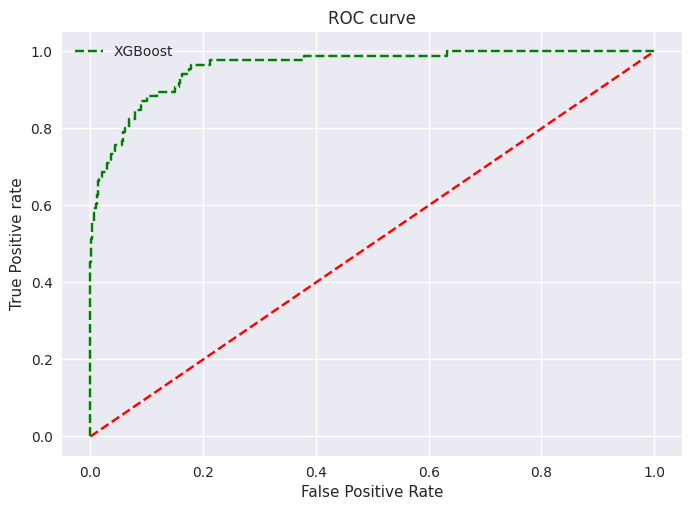

In [41]:
pred_prob1 = best_model.predict_proba(x_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1,)


# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1, multi_class='ovr')
print(auc_score1)

plt.style.use('seaborn')

plt.plot(fpr1, tpr1, linestyle='--',color='green', label='XGBoost')
plt.plot(p_fpr, p_tpr, linestyle='--', color='red')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

In [42]:
y_pred = best_model.predict(x_test)
clr = classification_report(y_pred, y_test)
print(clr)

              precision    recall  f1-score   support

           0       0.92      0.82      0.87       227
           1       0.56      0.83      0.67        58
           2       0.67      0.59      0.63       207
           3       0.32      0.40      0.36       162
           4       0.67      0.62      0.64       220
           5       0.88      0.71      0.79       239
           6       0.60      0.67      0.63        64
           7       0.87      0.86      0.86       209
           8       0.90      0.79      0.84       187
           9       0.49      0.64      0.55       174

    accuracy                           0.69      1747
   macro avg       0.69      0.69      0.68      1747
weighted avg       0.72      0.69      0.70      1747



In [43]:
class_accuracy = {}

for i in range(len(best_model.classes_)):
    class_label = best_model.classes_[i]
    class_accuracy[class_label] = accuracy_score(y_test[y_test == class_label], y_pred[y_test == class_label])
print("Class-wise Accuracy:")
for class_label, acc in class_accuracy.items():
    print(f"{class_label}: {acc}")


Class-wise Accuracy:
0: 0.9211822660098522
1: 0.5581395348837209
2: 0.6721311475409836
3: 0.32338308457711445
4: 0.6650485436893204
5: 0.8808290155440415
6: 0.5972222222222222
7: 0.8653846153846154
8: 0.896969696969697
9: 0.48695652173913045
